Dependencies

In [1]:
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, CFG, ChartParser
from pprint import pprint

Corpora 

In [2]:
nltk.download(['punkt_tab','punkt', 'stopwords', 'wordnet', 'omw-1.4', 
                'averaged_perceptron_tagger_eng', 'maxent_ne_chunker_tab', 'words'])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\exerc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       d

True

Tokenization

In [18]:
text = "The quick brown foxes can't jump over the lazy dogs. Mark Zuckerberg saw the man with the telescope."
words = word_tokenize(text)
sentences = sent_tokenize(text)
print(f"Text : {text}",end="\n\n")
for sentence in sentences:
    print(f"Sentence: {sentence}")
    print(f"Words: {word_tokenize(sentence)}")


Text : The quick brown foxes can't jump over the lazy dogs. Mark Zuckerberg saw the man with the telescope.

Sentence: The quick brown foxes can't jump over the lazy dogs.
Words: ['The', 'quick', 'brown', 'foxes', 'ca', "n't", 'jump', 'over', 'the', 'lazy', 'dogs', '.']
Sentence: Mark Zuckerberg saw the man with the telescope.
Words: ['Mark', 'Zuckerberg', 'saw', 'the', 'man', 'with', 'the', 'telescope', '.']


Stemmer

In [4]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

Lemmatizer

In [5]:
lemmatizer = WordNetLemmatizer()

Stemming and Lemmatizing

In [19]:
analysis_data = []
for w in words:
    analysis_data.append({
        "Word": w,
        "Porter": porter.stem(w),
        "Lancaster": lancaster.stem(w),
        "Snowball": snowball.stem(w),
        "Lemma": lemmatizer.lemmatize(w, pos='v') # 'v' for verb context
    })

In [7]:
def get_semantic_info(word):
    synsets = wn.synsets(word)
    if not synsets:
        return None
    synset = synsets[0]
    return {
        "Definition": synset.definition(),
        "Hypernyms" : [h.name() for h in synset.hypernyms()],
        "Hyponyms" : [h.name() for h in synset.hyponyms()],
        "Root": synset.root_hypernyms()[0].name()
    }

dog_semantics = get_semantic_info('marriage')

pprint(dog_semantics)



{'Definition': 'the state of being a married couple voluntarily joined for '
               'life (or until divorce)',
 'Hypernyms': ['marital_status.n.01'],
 'Hyponyms': ['cuckoldom.n.01',
              'open_marriage.n.01',
              'common-law_marriage.n.01',
              'endogamy.n.01',
              'exogamy.n.01',
              'monandry.n.01',
              'monogamy.n.01',
              'marriage_of_convenience.n.01',
              'misalliance.n.01',
              'sigeh.n.01',
              'bigamy.n.01',
              'polygamy.n.01'],
 'Root': 'entity.n.01'}


Named Entity Recognition

In [8]:
tagged = pos_tag(words)
entities = ne_chunk(tagged)

grammar = CFG.fromstring("""
  S -> NP VP
  NP -> DT N | DT N PP
  VP -> V NP | VP PP
  PP -> P NP
  NP -> PropN | Det N | NP PP | "I"
  PropN -> "Mark" | "Zuckerberg"
  Det -> "the" | "a"
  N -> "man" | "telescope"
  V -> "saw"
  P -> "with"
""")

parser = ChartParser(grammar)
ambiguous_sent = "Mark Zuckerberg saw the man with the telescope".split()
parses = list(parser.parse(ambiguous_sent))



--- Comparison of Normalization Techniques ---
          Word      Porter   Lancaster    Snowball       Lemma
0          The         the         the         the         The
1        quick       quick       quick       quick       quick
2        brown       brown       brown       brown       brown
3        foxes         fox         fox         fox         fox
4           ca          ca          ca          ca          ca
5          n't         n't         n't         n't         n't
6         jump        jump        jump        jump        jump
7         over        over          ov        over        over
8          the         the         the         the         the
9         lazy        lazi        lazy        lazi        lazy
10        dogs         dog         dog         dog         dog
11           .           .           .           .           .
12        Mark        mark        mark        mark        Mark
13  Zuckerberg  zuckerberg  zuckerberg  zuckerberg  Zuckerberg
14      

C:\Users\exerc\AppData\Local\Temp\ipykernel_14460\2980205909.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


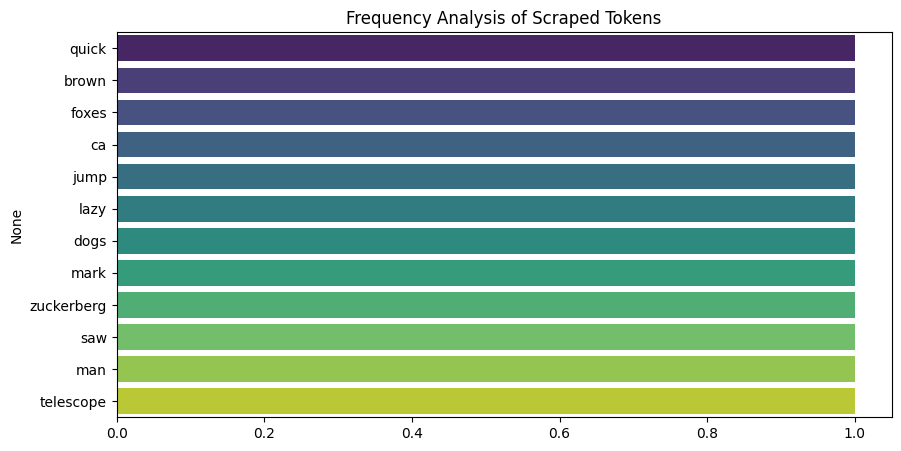

Detected 0 interpretations for the sentence.


In [20]:
import pandas as pd

# --- Visualize Stemming Comparison ---
df_stem = pd.DataFrame(analysis_data)
print("--- Comparison of Normalization Techniques ---")
print(df_stem)

# --- Visualize Word Frequencies (After Stopword Removal) ---
stop_words = set(stopwords.words('english'))
clean_words = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
word_counts = pd.Series(clean_words).value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')
plt.title("Frequency Analysis of Scraped Tokens")
plt.show()

# --- Visualize Parse Trees ---
print(f"Detected {len(parses)} interpretations for the sentence.")
for i, tree in enumerate(parses):
    print(f"\nInterpretation {i+1} Structure:")
    tree.pretty_print()